# 앙상블 (Ensemble) : Bagging (Bootstrap Aggegation)

- 다양한 모델을 결합하여 예측 성능을 향상시키는 방법
    - Boostrap 방식의 샘플링: 각 estimator 마다 훈련 데이터를 뽑을 때, 중복 값을 허용한 방식
    - 분류 모델의 경우, 각 tree(estimator)의 예측값을 다수결(hard voting) 결정
    - 회귀 모델의 경우, 각 tree(estimator)의 예측값을 평균내어 결정
    - 기본적으로 100개의 tree 사용

**하이퍼 파라미터**
| **하이퍼파라미터**      | **설명**                                                                                     | **기본값**      |
|--------------------------|--------------------------------------------------------------------------------------------|-----------------|
| `n_estimators`           | 생성할 트리의 개수 지정 (트리의 개수가 많을수록 성능이 좋아질 수 있지만 계산 비용 증가) | 100             |
| `criterion`              | 분할 품질을 측정하는 기준 (분류에서는 "gini" 또는 "entropy"를 사용)                 | "gini"          |
| `max_depth`              | 각 트리의 최대 깊이 (설정하지 않으면 트리는 잎 노드가 순수해질 때까지 계속 확장) | None            |
| `min_samples_split`      | 내부 노드를 분할하기 위해 필요한 최소 샘플 수 (과적합 방지 목적)                   | 2               |
| `min_samples_leaf`       | 리프 노드가 되기 위해 필요한 최소 샘플 수 (과적합 방지 목적)                          | 1               |
| `max_features`           | 각 트리를 분할할 때 고려할 최대 특성 수 ()"auto", "sqrt", "log2" 중 선택하거나, 특정 숫자 지정 가능) | "auto"          |
| `bootstrap`              | 각 트리를 만들 때 부트스트랩 샘플링을 사용할지 여부를 결정                               | True            |
| `random_state`           | 결과의 재현성을 위해 난수 시드 고정                                                  | None            |
| `n_jobs`                 | 병렬 계산을 위해 사용할 CPU 코어 수를 지정 (-1로 설정하면 모든 코어를 사용)           | None            |
| `class_weight`           | 각 클래스의 가중치를 자동으로 계산하거나 직접 지정 가능 (불균형 데이터 처리에 유용)    | None            |


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [4]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(
    n_estimators=101,
    max_depth=7,
    random_state=0
)
rf_clf.fit(X_train, y_train)

print(f"학습 점수: {rf_clf.score(X_train, y_train)}")
print(f"테스트 점수: {rf_clf.score(X_test, y_test)}")

학습 점수: 0.9978021978021978
테스트 점수: 0.9649122807017544


In [19]:
print(rf_clf.estimators_) # RandomForest 내부에 가지고 있는 모델들의 각 설정을 출력

### 101rodml DecisionTree 값을 확인

# max_depth=7 → 우리가 설정한 max_depth 값, 101개 동일
# random_state= , 101개의 전체는 random_state 0으로 지정해줬지만, 101개 내부에서는 랜덤으로 값을 지정해줌
# 그러나 전체적으로 반복해서 실행해도 값은 변하지 않음
# max_features = 속성을 몇개나 가지고 학습을 할 것인가. 4개를 입력하면 → sqrt(4) = 2개를 학습 데이터 속성으로 사용하겠다.

[DecisionTreeClassifier(max_depth=7, max_features='sqrt', random_state=209652396), DecisionTreeClassifier(max_depth=7, max_features='sqrt', random_state=398764591), DecisionTreeClassifier(max_depth=7, max_features='sqrt', random_state=924231285), DecisionTreeClassifier(max_depth=7, max_features='sqrt',
                       random_state=1478610112), DecisionTreeClassifier(max_depth=7, max_features='sqrt', random_state=441365315), DecisionTreeClassifier(max_depth=7, max_features='sqrt',
                       random_state=1537364731), DecisionTreeClassifier(max_depth=7, max_features='sqrt', random_state=192771779), DecisionTreeClassifier(max_depth=7, max_features='sqrt',
                       random_state=1491434855), DecisionTreeClassifier(max_depth=7, max_features='sqrt',
                       random_state=1819583497), DecisionTreeClassifier(max_depth=7, max_features='sqrt', random_state=530702035), DecisionTreeClassifier(max_depth=7, max_features='sqrt', random_state=626610453), D

In [20]:
print(rf_clf.estimators_samples_)

# estimators_samples_ → 101개의 Decision Tree 가 사용한 sample 데이터 확인 → array로 담고 있다.
# 학습에 사용된 sample 데이터의 index를 반환한다!

[array([236, 227, 434,  32,  64, 242, 310,  41, 423, 323, 239, 239, 201,
       198,   1,  49, 245, 263, 443, 415, 111, 251, 169, 167, 418, 432,
       295,  57, 245, 102,  31, 433, 218,  76, 395, 213, 108, 103, 325,
       304,  81, 156, 404,   3, 272, 101, 203, 206,  80, 126, 282, 111,
        32,  87, 224, 345, 121, 310, 390,  38, 390, 148, 207, 190, 164,
       370, 158,  60,  16, 136,  97, 119,   0, 171, 431, 431, 265, 378,
       257, 109, 367, 220, 448, 220, 235, 362, 361,  66, 220, 129, 373,
        90, 303, 165, 312, 418,  88, 390, 126, 351, 367, 453, 417, 184,
       102, 404, 353,  22,  45, 108, 407,  79, 303, 361, 371, 114, 257,
       286,   4,  93, 259, 324, 183, 276, 125,  66,  56, 193, 365, 186,
       349, 358, 224, 139, 134, 133, 270, 165, 159, 278, 295, 317, 140,
       144, 190, 403,  12, 109, 230, 237, 450, 154, 431, 335, 239, 227,
       216,  62,   5, 333, 273, 120,  24, 118, 423, 358, 420,  57, 232,
       406, 135, 289,  75,  65, 286,  59, 281, 376, 125, 122, 2

In [21]:
### Bootstrap 방식의 샘플링 확인

for i, sample_index in enumerate(rf_clf.estimators_samples_):
    print(f'{i}번째 DecisionTree의 샘플 인덱스: {sorted(sample_index)}')

# Bagging 복원 추출 방식으로 학습을 했기 때문에 동일한 인덱스의 번호가 많이 보인다.
# 101개의 트리에서 학습한 indexing을 확인

0번째 DecisionTree의 샘플 인덱스: [np.int32(0), np.int32(0), np.int32(1), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(12), np.int32(12), np.int32(13), np.int32(16), np.int32(16), np.int32(16), np.int32(20), np.int32(22), np.int32(22), np.int32(24), np.int32(25), np.int32(25), np.int32(26), np.int32(31), np.int32(32), np.int32(32), np.int32(32), np.int32(35), np.int32(36), np.int32(36), np.int32(36), np.int32(38), np.int32(38), np.int32(40), np.int32(41), np.int32(41), np.int32(44), np.int32(45), np.int32(49), np.int32(49), np.int32(49), np.int32(53), np.int32(53), np.int32(55), np.int32(56), np.int32(56), np.int32(56), np.int32(57), np.int32(57), np.int32(57), np.int32(57), np.int32(59), np.int32(59), np.int32(60), np.int32(60), np.int32(62), np.int32(63), np.int32(63), np.int32(64), np.int32(65), np.int32(65), np.int32(66), np.int32(66), np.int32(66), np.int32(71), np.int32(72), np.int32(73), np.int32(75), np.int32(76), np.int32(77), np.

In [23]:
feat_imptc_ser = pd.Series(rf_clf.feature_importances_, index=data.feature_names).sort_values(ascending=False)
feat_imptc_ser

worst perimeter            0.129254
mean concave points        0.128880
worst radius               0.120271
worst concave points       0.115861
worst area                 0.080612
mean concavity             0.068708
mean perimeter             0.052328
mean area                  0.045356
worst concavity            0.033184
area error                 0.028447
radius error               0.023401
mean radius                0.022526
mean texture               0.017679
worst symmetry             0.014521
perimeter error            0.014055
worst texture              0.014024
worst compactness          0.011704
worst smoothness           0.011396
mean smoothness            0.009407
worst fractal dimension    0.008111
texture error              0.006735
fractal dimension error    0.006175
concavity error            0.005719
compactness error          0.005441
concave points error       0.005287
symmetry error             0.005108
mean compactness           0.004904
smoothness error           0

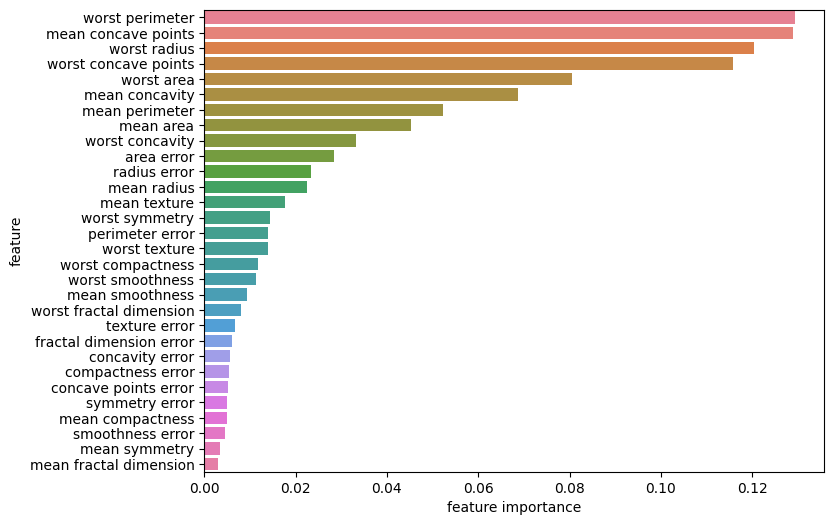

In [25]:
# 특성 중요도 시각화
plt.figure(figsize=(8,6))
sns.barplot(
    x=feat_imptc_ser,
    y=feat_imptc_ser.index,
    hue=feat_imptc_ser.index
)

plt.xlabel('feature importance')
plt.ylabel('feature')
plt.show()